# Artificial Intelligence Course - Fall 1402
## Computer Assignment #2 - Reinforcement Learning

# Table of Contents

- [Part 1: Value Iteration & Policy Iteration Algorithms](#1)
    - [َQuestion 1:](#1-0)
    - [َQuestion 2:](#1-1)
    - [َQuestion 3:](#1-12)
    - [َQuestion 4:](#1-2)
    - [َQuestion 5:](#1-3)
        - [Value Iteration](#1-3-1)
        - [Policy Iteration](#1-3-2)
    - [َQuestion 6:](#1-4)
        - [Value Iteration](#1-4-1)
        - [Policy Iteration](#1-4-2)
- [Part 2: Q-Learning Algorithm](#2)
    - [َQuestion 8:](#2-1)
    - [َQuestion 9:](#2-2)
    - [َQuestion 10:](#2-3)

In [1]:
# import
import numpy as np
import gym
import matplotlib.pyplot as plt
import time
import copy

<a name='1'></a>
## Part 1: Value Iteration & Policy Iteration Algorithms

In [2]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)

In [3]:
# get familiar with the environment
print("you can see the environment in each step by render command :")
env.reset()
# env.render()

you can see the environment in each step by render command :


(0, {'prob': 1})

In [4]:
# Total no. of states
env.observation_space.n

16

In [5]:
# Total no. of actions
env.action_space.n

4

<a name='1-0'></a>
### Question 1:

The Value Iteration algorithm is an algorithm for finding optimal value by solving the Bellman equations iteratively. It maintains the value function that approximates the optimal value function using dynamic programming concept.

This algorithm is used to obtain the optimal policy in MDP problems.

The goal in this problem is to find a policy that maximizes the expected cumulative reward over time. The optimal policy is a policy that, for each state, has the highest possible expected reward.

The Value Iteration algorithm works iteratively and gradually estimates the value function of states. This value function represents the expected cumulative reward that can be obtained from a state over time. In each iteration of the algorithm, the value function of each state is updated to gradually approach the optimal value function.

In the Value Iteration algorithm, we first initialize the initial value functions to 0 and then, until convergence, calculate the expected reward for each action for each state using the current value functions and transitions. We choose the action with the highest expected reward for each possible move. To check for convergence, we set a very small delta value, and when the difference between the new value and the previous value is less than this value, we say that the values have converged, and the algorithm stops.

By running the Value Iteration algorithm, we can obtain the optimal policy in an MDP problem. This algorithm iteratively updates the value function of states and ultimately generates a policy that has the highest expected cumulative reward over time.

$$
V_{k+1}(s) \leftarrow \max_a \sum_{s'} T(s,a,s') \left[ R(s,a,s') + \gamma V_k(s') \right]
$$

- **s** is our current state
- **a** is an action that we perform in state **s**
- **s'** is our next state after performing action **a** in state **s**

<a name='1-1'></a>
### Question 2:

In [6]:
class ValueIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.iterations = 0

    def value_estimation(self):
        self.delta = np.inf
        while(self.delta > self.theta):

            self.delta = 0

            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                for action in range(self.env.action_space.n):
                    action_value = 0
                    for probability, next_state, reward, done in self.env.P[state][action]:
                         action_value += probability * (reward + self.discount_factor * self.state_values[next_state])
                         
                    self.q_values[state, action] = action_value
                self.state_values[state] = np.max(self.q_values[state,:])
                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

            self.iterations+=1
            
    def get_num_iterations(self):
        return self.iterations

    def take_action(self, action):
        next_state, reward,  terminated, truncated, _ = self.env.step(action)
        return next_state, reward,  terminated, truncated

    def get_optimal_policy(self, state):
        return np.argmax(self.q_values[state,:])

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state
    
    def reset_value_iteration(self):
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.iterations = 0
        
    def change_env(self, env):
        self.env = env

<a name='1-12'></a>
### Question 3:

The Policy Iteration algorithm is another algorithm used to solve Markov Decision Process (MDP) problems. This algorithm aims to find the optimal policy in an MDP and consists of two important parts: policy evaluation and policy improvement.

In the policy evaluation stage, a random policy is selected, and the value of each state is estimated using this policy by applying the Bellman equation iteratively until the values converge.

In the policy improvement stage, the values obtained from policy evaluation are used to generate a new policy. If the new policy differs from the previous one, it indicates that the previous policy was not optimal. In this case, the process is repeated by going back to the policy evaluation stage until the policy no longer changes, indicating that the environment is stable and the optimal policy has been found.

By repeating the stages of policy evaluation and policy improvement, the Policy Iteration algorithm converges to the optimal policy. This algorithm guarantees the convergence to the optimal policy, but it may be time-consuming in some cases because both stages of policy evaluation and policy improvement require repeated computations.

By repeating the stages of policy evaluation and policy improvement, the Policy Iteration algorithm converges to the optimal policy. This algorithm guarantees the convergence to the optimal policy.

Policy Evaluation:
$$
\text{Repeat until convergence:}
$$
$$
V_{k+1}^{\pi_i}(s) \leftarrow  \sum_{s'} T(s, \pi_i(s), s') [r + \gamma V_{k}^{\pi_i}(s')]
$$
Policy Improvement:
$$
\pi_{i+1}(s) = \arg\max_a \sum_{s'} T(s, a, s') [r + \gamma V^{\pi_i}(s')]
$$

<a name='1-2'></a>
### Question 4:

In [7]:
class PolicyIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.policy = np.random.randint(self.env.action_space.n, size=self.env.observation_space.n) # initial policy
        self.policy_stable = False
        self.iterations = 0

    def policy_evaluation(self):
        self.delta = np.inf
        
        while(self.delta >= self.theta):
            self.delta =0
            for state in range(self.env.observation_space.n):
                v = self.state_values[state]
                new_state_value = 0
                for probability, next_state, reward, done in self.env.P[state][self.policy[state]]:
                    new_state_value += probability * (reward + self.discount_factor * self.state_values[next_state])
                self.state_values[state] = new_state_value
                self.delta = np.max([self.delta,abs(v - self.state_values[state])])
            self.iterations +=1
                

    def policy_improvement(self):
        self.policy_stable = True
        for state in range(self.env.observation_space.n):
            old_policy = self.policy[state]
            for action in range(self.env.action_space.n):
                action_value = 0
                for probability, next_state, reward, done in self.env.P[state][action]:
                    action_value += probability * (reward + self.discount_factor * self.state_values[next_state])
                self.q_values[state, action] = action_value
            self.policy[state] = np.argmax(self.q_values[state,:])
            if old_policy != self.policy[state]:
                self.policy_stable = False

    def policy_estimation(self):
        self.policy_stable = False
        while not self.policy_stable:
            self.policy_evaluation()
            self.policy_improvement()
            
    def get_num_iterations(self):
        return self.iterations

    def take_action(self, action):
        next_state, reward,  terminated, truncated, _ = self.env.step(action)
        return next_state, reward,  terminated, truncated

    def get_optimal_policy(self, state):
        return self.policy[state]

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state
    
    def reset_policy_iteration(self):
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.policy = np.random.randint(self.env.action_space.n, size=self.env.observation_space.n)
        self.policy_stable = False
        self.iterations = 0
        
    def change_env(self, env):
        self.env = env

<a name='1-3'></a>
### Question 5:

In [8]:
num_episodes_learning = 100
num_episodes_test = 5

<a name='1-3-1'></a>
#### Value Iteration:

In [9]:
num_vi_iterations = [None for _ in range(num_episodes_learning)]
episode_times_VI = [None for _ in range(num_episodes_learning)]

value_iteration = ValueIteration(env,discount_factor=0.9)
for episode in range(num_episodes_learning):
    value_iteration.reset_value_iteration()
    state = value_iteration.reset()[0]
    start_time = time.time()
    value_iteration.value_estimation()
    num_vi_iterations[episode] = value_iteration.get_num_iterations()
    episode_times_VI[episode] = time.time() - start_time
        

<a name='1-3-2'></a>
#### Policy Iteration:

In [10]:
num_pi_iterations = [None for _ in range(num_episodes_learning)]
episode_times_PI = [None for _ in range(num_episodes_learning)]
policy_iteration = PolicyIteration(env, discount_factor=0.9)
for episode in range(num_episodes_learning):
    policy_iteration.reset_policy_iteration()
    state = policy_iteration.reset()[0]
    start_time = time.time()
    policy_iteration.policy_estimation()
    num_pi_iterations[episode] = policy_iteration.get_num_iterations()
    episode_times_PI[episode] = time.time() - start_time
    


#### *Test VI*

In [11]:
env = gym.make('FrozenLake-v1', render_mode='human',desc=None, map_name="4x4", is_slippery=False)
value_iteration.change_env(env)
for episode in range(num_episodes_test):
    state = value_iteration.reset()[0]
    terminated, truncated = False, False
    while not terminated and not truncated:
        action = value_iteration.get_optimal_policy(state)
        next_state, reward,  terminated, truncated = value_iteration.take_action(action)
        state = next_state
        value_iteration.env.render()
        

C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


#### *Test PI*


In [12]:
policy_iteration.change_env(env)
for episode in range(num_episodes_test):
    state = policy_iteration.reset()[0]
    terminated, truncated = False, False
    while not terminated and not truncated:
        action = policy_iteration.get_optimal_policy(state)
        next_state, reward,  terminated, truncated = policy_iteration.take_action(action)
        state = next_state
        policy_iteration.env.render()
env.close()     

<a name='1-4'></a>
### Question 6:

In [13]:
def map_number_to_color(number):
    green_value = int((number*3 / 1) * 255)
    color = (0, green_value/1000, 0)
    return color

In [14]:
def plot_q_values(data):
    fig, axs = plt.subplots(4, 4, figsize=(4, 4))

    for i in range(4):
        for j in range(4):
            ax = axs[i, j]
            
            coords1 = np.array([[0, 1], [0, 0], [0.5, 0.5], [0.5, 0.5]])
            coords2 = np.array([[1, 1], [0, 1],  [0.5, 0.5], [0.5, 0.5]])
            coords3 = np.array([[1, 0], [1, 1],  [0.5, 0.5], [0.5, 0.5]])
            coords4 = np.array([[0, 0], [1, 0],  [0.5, 0.5], [0.5, 0.5]])
            ax.fill(coords2[:, 0], coords2[:, 1], color =  map_number_to_color(data[i*4 + j, 3]))
            ax.fill(coords3[:, 0], coords3[:, 1],color =   map_number_to_color(data[i*4 + j, 2]))
            ax.fill(coords4[:, 0], coords4[:, 1], color = map_number_to_color(data[i*4 + j, 1]))
            ax.fill(coords1[:, 0], coords1[:, 1],color = map_number_to_color(data[i*4 + j, 0]))
            
            ax.text(0.5, 0.75, f'{data[i*4 + j, 3]:.2f}', ha='center', va='center', color='w')
            ax.text(0.75, 0.5, f'{data[i*4 + j, 2]:.2f}', ha='center', va='center', color='w')
            ax.text(0.5, 0.25, f'{data[i*4 + j, 1]:.2f}', ha='center', va='center', color='w')
            ax.text(0.25, 0.5, f'{data[i*4 + j, 0]:.2f}', ha='center', va='center', color='w')
            
            ax.set_xticks([])
            ax.set_yticks([])
            ax.axis('off')

    plt.tight_layout()
    plt.show()


def plot_state_values(data):
    fig, axs = plt.subplots(4, 4, figsize=(4, 4))
    
    for i in range(4):
        for j in range(4):
            ax = axs[i, j]
            ax.text(0.5, 0.5, f'{data[i*4 + j]:.2f}', ha='center', va='center', color='b')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.axis('off')
            ax.fill([0, 1, 1, 0], [0, 0, 1, 1],color = map_number_to_color(data[4*i+j]))
    plt.tight_layout()
    plt.show()

def plot_state_values(data):
    fig, axs = plt.subplots(4, 4, figsize=(4, 4))
    
    for i in range(4):
        for j in range(4):
            ax = axs[i, j]
            ax.text(0.5, 0.5, f'{data[i*4 + j]:.2f}', ha='center', va='center', color='b')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.axis('off')
            ax.fill([0, 1, 1, 0], [0, 0, 1, 1],color = map_number_to_color(data[4*i+j]))
    plt.tight_layout()
    plt.show()
    
def plot_l2(first, second, x_len,y_l,x_l,title_p,frt_l='ValueIteration', sec_l = 'PolicyIteration'):
    x = [i for i in range(1,x_len+1)]
    plt.plot(x,first,label=frt_l)
    plt.plot(x,second,label=sec_l)
    plt.xlabel(x_l)
    plt.ylabel(y_l)
    plt.title(title_p)
    plt.legend()
    plt.show()

def plot_l1(data, x_len,x_l,y_l,title_p,p_l):
    x = [i for i in range(1,x_len+1)]
    plt.plot(x,data,label=p_l)
    plt.xlabel(x_l)
    plt.ylabel(y_l)
    plt.title(title_p)
    plt.legend()
    plt.show()


def plot_policy(agent):
    fig, axs = plt.subplots(4, 4, figsize=(4, 4))
    directions = {3: "↑", 1: "↓", 0:  "←", 2: "→"}
    for i in range(4):
        for j in range(4):
            ax = axs[i, j]
            ax.text(0.5, 0.5, directions[agent.get_optimal_policy(4*i+j)], ha='center', va='center', color='b')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.axis('off')
    plt.tight_layout()
    plt.show()

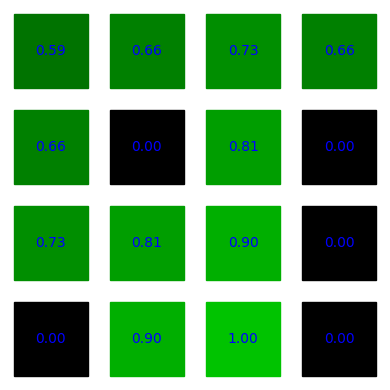

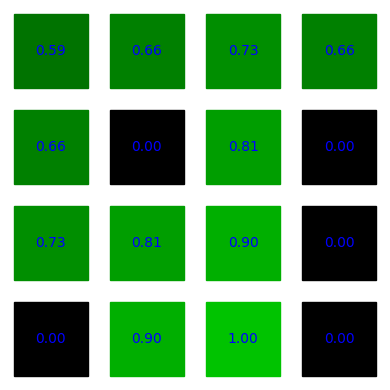

In [15]:

plot_state_values(policy_iteration.get_state_values())
plot_state_values(value_iteration.get_state_values())

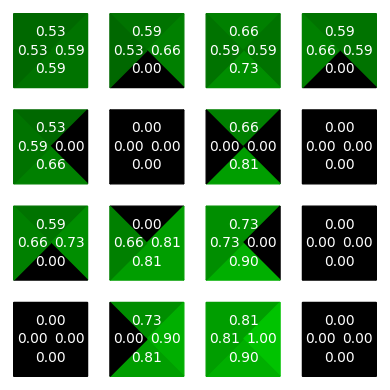

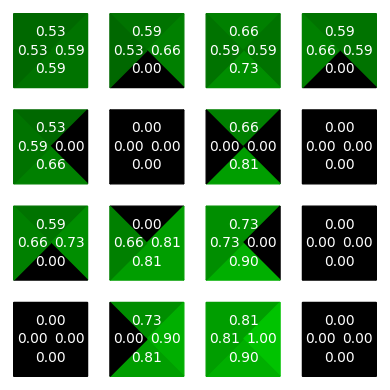

In [16]:
plot_q_values(policy_iteration.get_q_values())
plot_q_values(value_iteration.get_q_values())

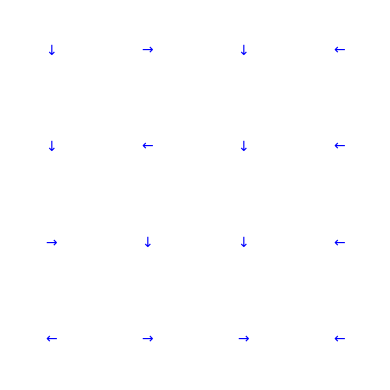

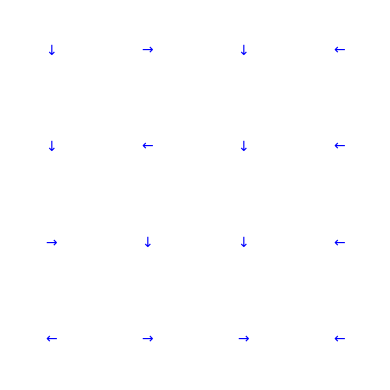

In [17]:
plot_policy(policy_iteration)
plot_policy(value_iteration)

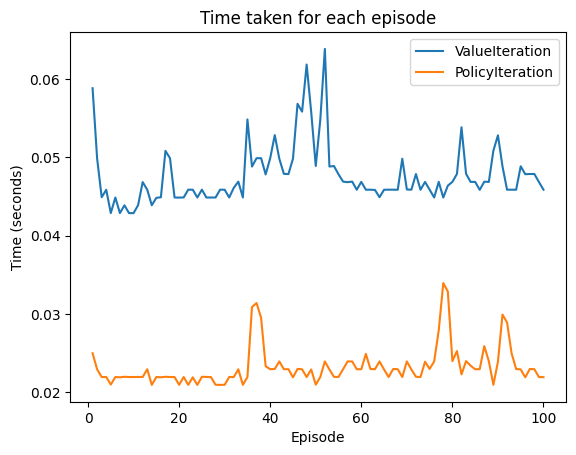

In [18]:
plot_l2(episode_times_VI,episode_times_PI,num_episodes_learning,
       y_l='Time (seconds)',x_l='Episode',title_p='Time taken for each episode')

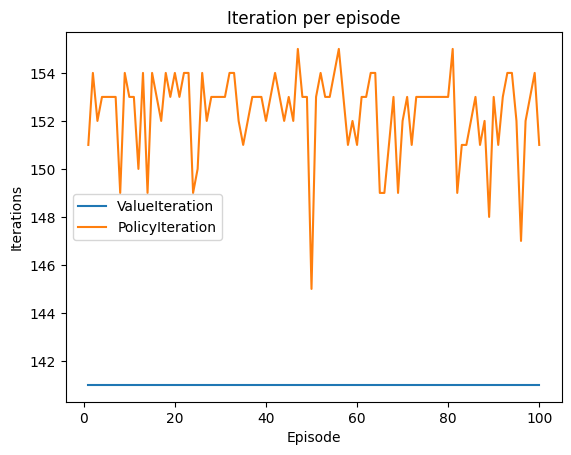

In [19]:
plot_l2(num_vi_iterations,num_pi_iterations, num_episodes_learning, y_l='Iterations',x_l='Episode',title_p='Iteration per episode')

As evident from the plotted graphs, the number of iterations in the Policy Iteration algorithm is higher than that of the Value Iteration algorithm. This is because the Policy Iteration algorithm iterates through the stages of policy evaluation and policy improvement in combination.

In each iteration of the Policy Iteration algorithm, the policy is first estimated by evaluating the values of states based on the current policy. Then, the policy is improved by selecting actions that maximize the expected return. This iterative process continues until the improved policy no longer changes, indicating that the optimal policy has been reached.

On the other hand, the Value Iteration algorithm updates the values of all states simultaneously in each iteration. This approach can lead to a reduction in the number of iterations compared to Policy Iteration.

Although the number of iterations in the Policy Iteration algorithm is higher than that of the Value Iteration algorithm, the average time taken to complete the algorithm is lower. This means that despite having more iterations, the iterations are performed in less time, resulting in the Policy Iteration algorithm completing in less time.

As we have learned in the lesson, the time complexity of these two algorithms also supports this expectation.

**Policy Iteration:**
$$
\mathcal{O}(|S|^2)
$$
**Value Iteration:**
$$
\mathcal{O}(|S|^2 \cdot |A|)
$$

<a name='2'></a>
## Part 2: Q-Learning Algorithm

In [20]:
# hyperparameters
REPS = 20
EPISODES = 2000
EPSILON = 0.1
LEARNING_RATE = 0.9
DISCOUNT = 0.9
STUDENT_NUM = 132

In [21]:
# environment
env = gym.make('Taxi-v3',render_mode = 'human')
Initial_State ,_= env.reset(seed=STUDENT_NUM)
Initial_State

68

In [22]:
taxi_row, taxi_col, pass_idx, dest_idx = env.decode(Initial_State)
taxi_row, taxi_col, pass_idx, dest_idx

(0, 3, 2, 0)

In [23]:
# get familiar with the environment
print("you can see the environment in each step by render command :")
env.render()

you can see the environment in each step by render command :


In [24]:
# Total no. of states
env.observation_space.n

500

In [25]:
# Total no. of actions
env.action_space.n

6

In [26]:
env.close()

### Question 7:

Q-learning is an algorithm in reinforcement learning to solve Markov Decision Process (MDP) problems. In Q-learning, the agent interacts with an environment and learns to make optimal decisions by updating its Q-values.
The Q-values represent the expected rewards an agent can receive by taking a specific action in a particular state.As the agent explores the environment and takes actions, it updates the Q-values based on the rewards received and the maximum Q-value of the next state.
In the Q-learning algorithm, At each time step, the agent observes the current state and selects an action based on an exploration-exploitation strategy, such as epsilon-greedy and algorithm follows an iterative process.
After taking each action, the agent receives a reward from the environment, it can be negative and show punishment. It then updates the Q-value of the previous state using the following formula:

$$ Q(s, a) = (1-\alpha)Q(s, a) + \alpha \cdot (r + \gamma \cdot \max(Q(s', a'))) $$
- Q(s, a) represents the Q-value of state s and taking action a.
- α is the learning rate, which determines the importance of the new sample information compared to the existing Q-value.
- r is the reward received after taking action a in state s.
- γ is the discounting factor, it determines the importance of future rewards.
- Q(s', a') represents the maximum Q-value of the next state s' and all possible actions a' that can be taken from that state.

By updating the Q-values, the agent learns to make optimal decisions in the given environment.

In [27]:
# base code for Q-learning

env = gym.make('Taxi-v3',render_mode ='human')
env.reset(seed = STUDENT_NUM)


for rep in range(REPS):
    agent = # Agent Object instance from Algorithm_name(e.g Q_learning_agent) class which has inherited from Agentbase.
    for episode in range(EPISODES):
        Initial_state = env.reset()

        for ... :

            bestAction = np.random.choice(ACTIONS)

            next_state,rew,done,_ = environment.step(bestAction)

            if done:
                break

SyntaxError: invalid syntax (3260965548.py, line 8)

<a name='2-1'></a>
### Question 8:

In [28]:
class QLearningAgent():
    def __init__(self, env, epsilon, learning_rate, discount_factor, seed):
      self.env = env
      self.epsilon = epsilon
      self.oep = epsilon
      self.learning_rate = learning_rate
      self.olr = learning_rate
      self.discount_factor = discount_factor
      self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
      self.seed = seed

    def choose_action(self, state):
      if np.random.uniform(0, 1) < self.epsilon:
            action = np.random.randint(self.env.action_space.n)
      else:
            action = self.get_optimal_policy(state)
      return action

    def update_q_table(self, state, action, nextState, reward):  
      self.q_table[state][action] = (1 - self.learning_rate) * self.q_table[state][action] + self.learning_rate * (
                    reward + self.discount_factor * np.max(self.q_table[nextState]))

    def decay_epsilon(self, episode):
      self.epsilon = float(self.epsilon/((episode+1)**(1/4)))

    def decrease_learning_rate(self, episode):
      self.learning_rate = float(self.olr/((episode+1)**(1/8)))      

    def take_action(self, action):
      next_state, reward, terminated, truncated, _ = self.env.step(action)
      return next_state, reward, terminated, truncated

    def get_optimal_policy(self, state):
      return np.argmax(self.q_table[state])

    def get_q_values(self):
      return self.q_table

    def reset(self):
      # self.learning_rate = self.olr
      return self.env.reset(seed=self.seed)

    def reset_qlearning(self):
      self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
      self.learning_rate =self.olr
      self.epsilon = self.oep
      self.reset()

    def change_env(self, env):
       self.env = env

In [29]:
def train(agent,decs):
    episodes_reward = np.full(EPISODES, None)
    episode_times = np.full(EPISODES, None)

    for episode in range(EPISODES):
        reward = 0
        cur_state,_ = agent.reset()
        start_time = time.time()
    
        terminated , truncated = False, False
        for _ in range(100):
            bestAction = agent.choose_action(cur_state) 
            next_state,rew, terminated, truncated = agent.take_action(bestAction)
            reward += rew
            agent.update_q_table(cur_state,bestAction,next_state,rew)
            cur_state = next_state
            if terminated or truncated: break
        if decs :
            agent.decrease_learning_rate(episode)
        agent.decay_epsilon(episode) 
    
        episode_times[episode] = time.time() - start_time
        episodes_reward[episode] = reward


    return copy.deepcopy(episode_times),copy.deepcopy(episodes_reward)
    

In [30]:
env.close()

<a name='2-2'></a>
### Question 9:

In [31]:
env = gym.make('Taxi-v3')
env.reset(seed = STUDENT_NUM)

rewards_reps1 =[]
times_reps1 =[]

mean_rewards1 =[]
mean_times1 =[]

agent1 = None
for rep in range(REPS):
    agent1 = QLearningAgent(env=env,epsilon=EPSILON,learning_rate = LEARNING_RATE, discount_factor=DISCOUNT, seed=STUDENT_NUM)
    times, rewards = train(agent1,False)
    times_reps1.append(times)
    rewards_reps1.append(rewards)

mean_rewards1 = [int(np.mean([rewards_reps1[j][i] for j in range(REPS)])) for i in range(EPISODES)]
mean_times1 = [float(np.mean([times_reps1[j][i] for j in range(REPS)])) for i in range(EPISODES)]

env.close()
    


In [32]:
env = gym.make('Taxi-v3')
env.reset(seed = STUDENT_NUM)

rewards_reps2 =[]
times_reps2 =[]

mean_rewards2 =[]
mean_times2 =[]

agent2 = None
for rep in range(REPS):
    agent2 = QLearningAgent(env=env,epsilon=EPSILON,learning_rate = LEARNING_RATE, discount_factor=DISCOUNT, seed=STUDENT_NUM)
    times, rewards = train(agent2,True)
    rewards_reps2.append(rewards)
    times_reps2.append(times)

mean_rewards2 = [int(np.mean([rewards_reps2[j][i] for j in range(REPS)])) for i in range(EPISODES)]
mean_times2 = [float(np.mean([times_reps2[j][i] for j in range(REPS)])) for i in range(EPISODES)]
env.close()

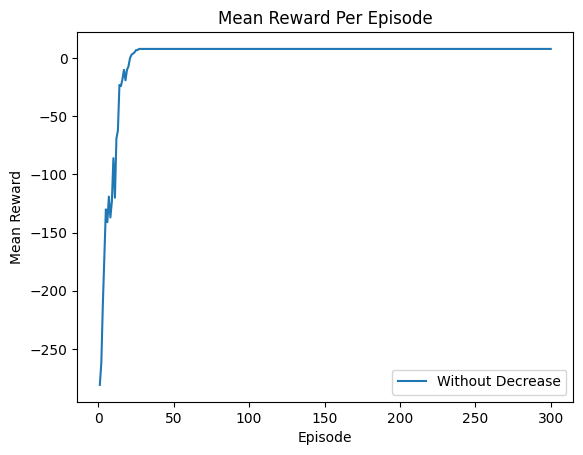

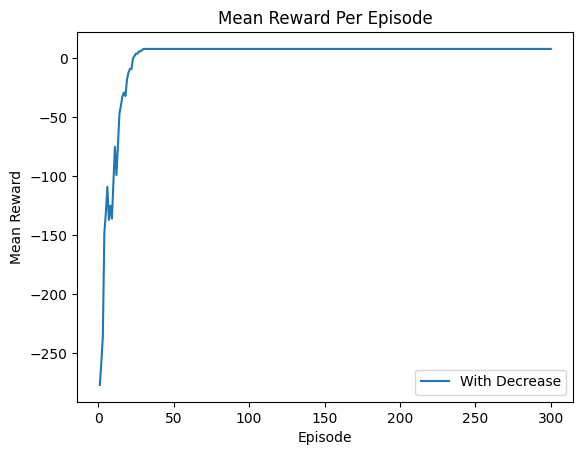

In [33]:
plot_l1(mean_rewards1[:300], x_len=300,x_l='Episode',y_l='Mean Reward',title_p='Mean Reward Per Episode',p_l='Without Decrease')
plot_l1(mean_rewards2[:300], x_len=300,x_l='Episode',y_l='Mean Reward',title_p='Mean Reward Per Episode',p_l='With Decrease')

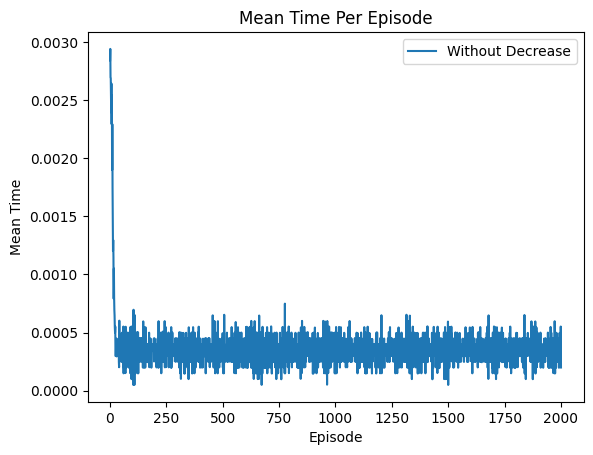

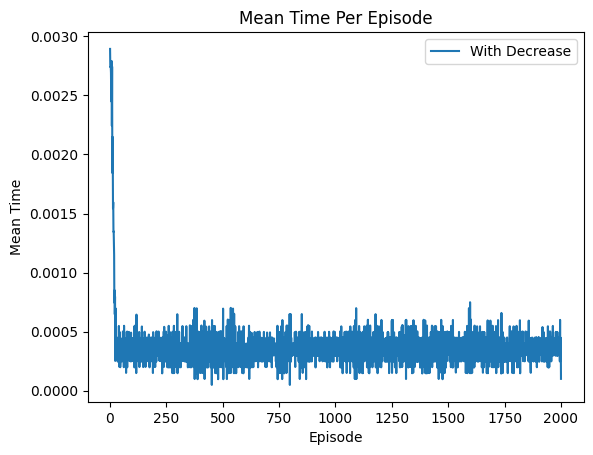

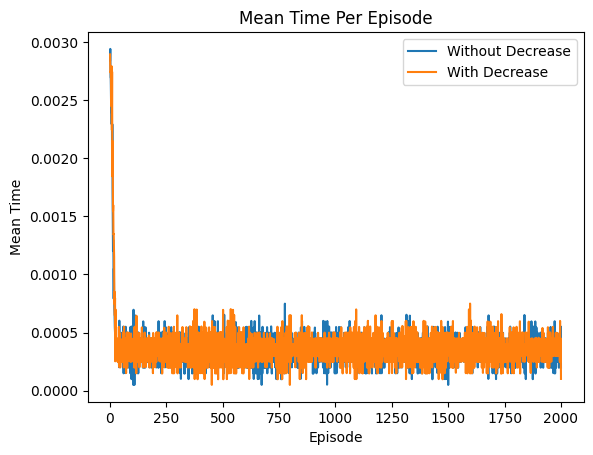

In [34]:
plot_l1(mean_times1, x_len=EPISODES,x_l='Episode',y_l='Mean Time',title_p='Mean Time Per Episode',p_l='Without Decrease')
plot_l1(mean_times2, x_len=EPISODES,x_l='Episode',y_l='Mean Time',title_p='Mean Time Per Episode',p_l='With Decrease')
plot_l2(mean_times1,mean_times2, x_len=EPISODES,x_l='Episode',y_l='Mean Time',title_p='Mean Time Per Episode',frt_l='Without Decrease', sec_l='With Decrease')


#### Decreasing Learning Rate
Intuitively, when we are in an unfamiliar environment with no prior knowledge, acquiring new information is much more valuable than when we already have gathered a lot of information and then receive new information after a long time. Similarly, for this algorithm, we can say intuitively that as we become more familiar with the environment, our need for new information decreases. It is better for us to focus more on improving the quality of the information rather than acquiring more information. The goal is for our information to converge to an optimal state.

If we delve into more details, we can say that the decreasing learning rate has the following effects:

- In the early stages of learning, when we have limited information about the environment and the Q-values are not accurate, we need a greater number of environment samples. This is because we need more exploration to gather information and improve the Q-values.
- On the other hand, this approach initially accelerates the learning process, and then focuses on improving the quality of learning with subsequent experiences. This allows the algorithm to converge faster (sometimes) and reach a balanced state.
- Additionally, using a decreasing learning rate helps prevent the algorithm from getting stuck in local optima. By gradually reducing the learning rate, the algorithm can explore different options and avoid prematurely converging to suboptimal solutions.


#### Decrease Epsilon

To decrease epsilon, I used this equation :

$$
\epsilon = \frac{\epsilon}{{\sqrt[4]{\text{{episode}}+1}}}
$$

And the reason behind it was that in this stage, we need \epsilon to decrease with each episode compared to the previous one, but this decrease should not be too significant. Therefore, I used this function because using the fourth root (or nth root) in each stage gradually reduces epsilon. This is because the denominator becomes larger, but not significantly larger, resulting in a relatively small difference compared to the previous state.

<a name='2-3'></a>
### Question 10:

In [35]:
env = gym.make('Taxi-v3',render_mode='human')
env.reset(seed = STUDENT_NUM)
agent1.change_env(env)

Initial_state,_ = agent1.reset()
truncated , terminated = False, False
while not terminated and not truncated:
    bestAction = agent1.get_optimal_policy(Initial_state)
    next_state,rew, terminated, truncated = agent1.take_action(bestAction)
    Initial_state = next_state
    env.render()
env.close()